In [124]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix

In [125]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [126]:
df = pd.read_csv("C:\\Users\\Grano\\kaggle\\Healthcare-Diabetes.csv")
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [127]:
target_column = ['Outcome'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,0.500181,0.220163,0.608556,0.566675,0.189313,0.094714,0.398727,0.194708,0.409040,0.343931
std,0.288727,0.195518,0.160987,0.157635,0.145996,0.132745,0.100200,0.134574,0.145398,0.475104
min,0.000361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032231,0.259259,0.000000
25%,0.250271,0.058824,0.497487,0.508197,0.000000,0.000000,0.338710,0.100826,0.296296,0.000000
50%,0.500181,0.176471,0.587940,0.590164,0.209091,0.043735,0.399504,0.154959,0.358025,0.000000
75%,0.750090,0.352941,0.708543,0.655738,0.290909,0.153664,0.454404,0.257851,0.493827,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [128]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1937, 9)
(831, 9)


In [129]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [133]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=9))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy', 'mse'])

In [134]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),  epochs=32)

Epoch 1/32
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6531 - loss: 0.6385 - mse: 0.2236 - val_accuracy: 0.7208 - val_loss: 0.5824 - val_mse: 0.1972
Epoch 2/32
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7192 - loss: 0.5721 - mse: 0.1935 - val_accuracy: 0.7605 - val_loss: 0.5094 - val_mse: 0.1673
Epoch 3/32
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7574 - loss: 0.5173 - mse: 0.1706 - val_accuracy: 0.7882 - val_loss: 0.4684 - val_mse: 0.1497
Epoch 4/32
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7630 - loss: 0.4925 - mse: 0.1616 - val_accuracy: 0.7954 - val_loss: 0.4442 - val_mse: 0.1408
Epoch 5/32
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7692 - loss: 0.4842 - mse: 0.1592 - val_accuracy: 0.7677 - val_loss: 0.4764 - val_mse: 0.1542
Epoch 6/32
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7734 - loss: 0.4759 - mse: 0.1563 - val_accuracy: 0.7918 - val_loss: 0.4516 - val_mse: 0.1442
Epoch 7/32
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

In [132]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Accuracy on training data: 0.8590604066848755% 
 Error on training data: 0.1409395933151245
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step
Accuracy on test data: 0.8315283060073853% 
 Error on test data: 0.16847169399261475


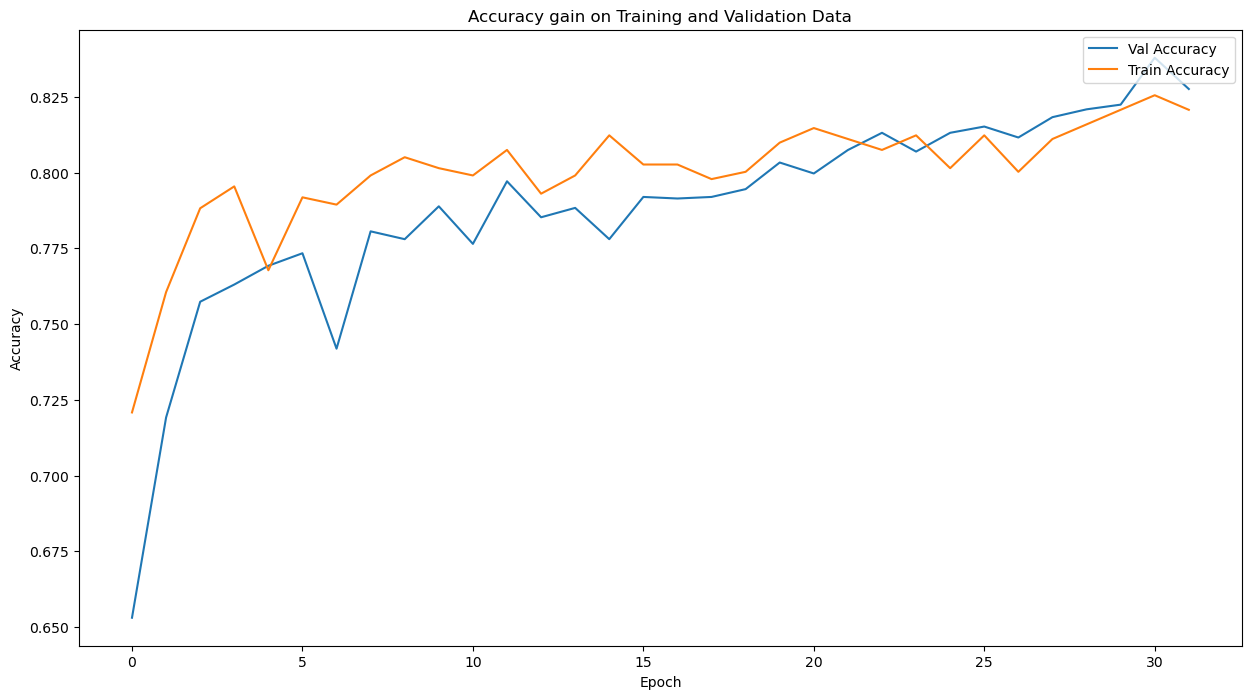

In [135]:
plt.figure(figsize=(15,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy gain on Training and Validation Data')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Val Accuracy', 'Train Accuracy'], loc='upper right')
plt.show()

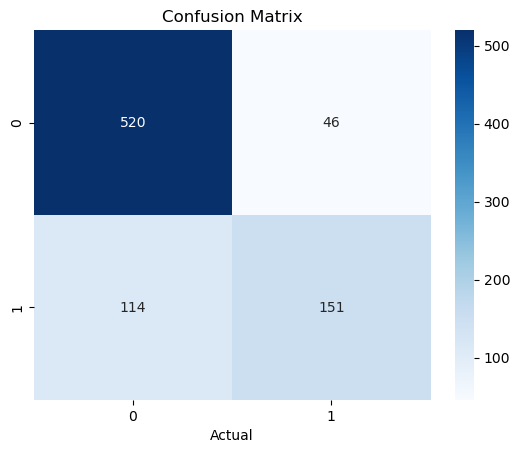

In [111]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()